## Keras #9 Using the pretrained Models
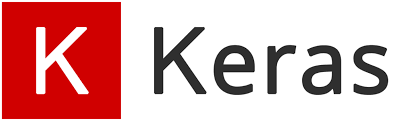

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# load model
model = ResNet50(weights='imagenet')

Using TensorFlow backend.


![](elephant.jpg)

In [2]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [3]:
prediction = model.predict(x)

print('Predicted:', decode_predictions(prediction, top=5)[0])

Predicted: [('n01871265', 'tusker', 0.55558306), ('n02504013', 'Indian_elephant', 0.37132487), ('n02504458', 'African_elephant', 0.052745536), ('n02437312', 'Arabian_camel', 0.0067960923), ('n02408429', 'water_buffalo', 0.00518526)]


## Extract layers and features

In [4]:
from keras.models import Model
from keras.applications.vgg19 import VGG19

base_model = VGG19(weights='imagenet')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
block5_pool_features = model.predict(x)
block5_pool_features

array([[[[ 10.003585  ,   0.        ,   0.        , ...,   0.        ,
           10.357618  ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
           11.656241  ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [  0.31845877,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [ 11.792924  ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [ 13.626473  ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]],

        [[ 22.895048  ,   0.        ,   0.        , ...,   0.        ,
            9.34225   ,   0.        ],
         [ 11.856315  ,   0.        ,   0.        , ...,   0.        ,
           12.923233  ,   0.        ],
         [106.01637   ,   0.        ,   4.595769  , ...,   0.        ,
            0.        ,  14.68461

## Using pretrained layers for transfer-learning

In [7]:
from keras.layers import Flatten, Dense, Dropout

base_model = VGG19(weights = "imagenet", include_top=False, input_shape = (256, 256, 3))

for layer in base_model.layers[:5]:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________